# Analyzing Profitable App Profiles in Google Play and Apple Store
In this project, we are hired as a Data Analyst for a company that makes applications in Andriod and iOS. We only make free to install english applications. We make revenue out of our applications through in-app ads which means the more user that we have that sees and engages in ads, the more revenue that we get. 

*Our goal for this project is to analyze applications from Apple Store and Google Play Store that are English, Free-to-use apps to help our developers understand what type of apps are likely to attract more users hence, we will look at three different factors of a succesfull app, namely:*
- Number of Installs
- Number of Reviews
- Number of Apps in that genre

## Summary of Results
After careful cleaning, prepping and analysis, the two factors we heavily focused on is **Number of Installs** and **Number of Reviews** since we found no evidence of **Number of Apps in that genre** that are linked to being profitable. All the findings for a popular and profitable apps that we get have more installs and reviews which are connected to our goal.

We decided to invest in Gaming App since this genre has the least skew of installs and reviews from tech giants unlike **Social Networking** and **Communication** Apps. Also, Gaming Genre has a wide sub-genre within it which means more genres to explore hence we will give this analysis to the devs to decide what genre of games will be achievable for them.

#### Function Explanation

`explore_data()` takes four parameters:
- dataset **:** a list of list data set
- start **:** starting index of the data you want to explore
- end **:** ending index of the data you want to explore
- row_and_columns **:** Defaulted to `False` if no value is supplied. Put `True` if you want to print out the rows of data

_**returns** a specified list of range of rows separated by newline._

> The function prints the starting and ending index of a data set separated by a blank space in each execution of row. And if row_and_columns has an input of `True` instead of `False` when the function is called, the number of row and column is printed also.

##### Usage : **We are going to use this function to get familiar to the data that we are working on with less rows for less confusion.**

In [1]:
def explore_data(dataset, start, end, row_and_columns=False):
    data_slice = dataset[start:end]; # The range of rows in the data set that we want to explore
    
    for row in data_slice: # Printing the rows from the range of rows(`data_slice`) one-by-one with newline
        print(row);
        print("\n");
    
    if row_and_columns: # Print the number of rows and column of the original data set
        print("Number of rows: {len_row_dataset:,}".format(len_row_dataset=len(dataset)));
        print("Number of columns: {len_col_dataset:,}".format(len_col_dataset=len(dataset[0])));
        print("\n")

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play. Collecting and analyzing this much data requires huge amount of money and resources, hence we are going to use a sample of the data instead.

The sample data that we are going to use has only 10,000 Android Apps for Google Play and 7,000 iOS Apps for Apple Store. To know more about this data, click each documentation below.
### Apple Store Documentation: [Click Here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)
###### Some Ambiguous Column Explanation
- "sup_devices.num": Number of supporting devices
- "ipadSc_urls.num": Number of screenshots showed for display
- "lang.num": Number of supported languages
- "vpp_lic": Vpp Device Based Licensing Enabled

### Google Play Store Documentation: [Click Here](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv)
###### Some Ambiguous Column Explanation
- "Type": Paid or Free

In [2]:
from csv import reader;
# Read in data (For iOS)
open_fileAS = open("AppleStore.csv", encoding='utf-8');
read_fileAS = reader(open_fileAS);

# Read in data (For Android)
open_fileGPS = open("googleplaystore.csv", encoding='utf-8');
read_fileGPS = reader(open_fileGPS);

# Turn the Apple Store csv file into a list of list
ios_data = list(read_fileAS);
ios_header = ios_data[0]; # iOS Column Headers
ios_data = ios_data[1:]; # Excluding the header row

# Turn the Google Play Store csv file into a list of list
android_data = list(read_fileGPS);
android_header = android_data[0]; # iOS Column Headers
android_data =android_data[1:]; #Excluding the header row

# Function `explore_data' to Explore the rows of the data set
print(ios_header, "\n");
explore_data(ios_data, 0, 2, True);
print(android_header, "\n");
explore_data(android_data, 0, 2, True);

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Number of rows: 7,197
Number of columns: 16


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Every

### Output Explanation
We can see here that our iOS Data set has 7,197 entries / application and has 16 columns to categorize each information in the row. **track_name**, **rating_count_tot** and **prime_genre** are the ones that we are going to use for our analysis. 

10,841 applications for android data set with 13 columns to identify each information in the row. **App**, **Category**, **Rating**, **Reviews** are the ones that we are going to use frequently to help our analysis.

## Cleaning
In order to call our data set _"clean"_ we need each data entry/point to be consistent, hence in this section we are going to find any inconsistent data in our data set like say for example, **Duplicate entries**, **Data that aren't needed in our analysis** or **"Missing" / Incomplete entries***.

### Walkthrough Explanation ( Removing Incomplete Data Entries )
Upon checking the documentation for both platforms, One user pointed out and describe an error in Android Data Set in which there is a missing **Category** value hence a column shift happens.

*We can verify this by making a function that checks if the length of the column header of a data set is not equal to the number of elements of a list, then we display that particular list.*

#### Function Explanation
`isLength_row` takes two parameters.
- dataset: a list of list dataset
- store: Either "Google" or "Apple"
> identifies if a data set has a row that its length is not equal to the header length of it's data set.

##### Usage: We are going to use this function to identify data entries that has incomplete details. 

In [3]:
def isLength_row(dataset, store):
    length = 0;
    
    # Checks if store is either google or apple and assign corresponding column length
    if store == "google" or store == "Google":
        length = 13
    elif store == "apple" or store == "Apple":
        length = 16;
    else:
        print("Wrong store! Input an appropriate store...");
        
    # Checks every row in the data set if its number of elements is not equal to the column length
    for row in dataset:
        if len(row) != length:
            print("Store name:", store);
            print(row, "\n");
            print("Index of the row:", dataset.index(row))

> If a row is printed below, delete it with the syntax **"del dataset[index]"** else **don't do anything**.

In [4]:
isLength_row(ios_data, "apple");
print(android_header, "\n")
isLength_row(android_data, "google");

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

Store name: google
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up'] 

Index of the row: 10472


### Output Explanation
By making an `isLength_row()` function, we did verify that there is a data entry that has a missing **Category** value that resulted to _"1.9"_ being the category for the app. We are also presented by the index of that row necessary for _"row deletion"_.

> As the category column being a vital column header for our analysis, we need to remove this as this will provide incorrect result for our analysis.

We've also applied the function to the Apple Data Set and we found no row having an incomplete data, hence we are moving forward.

#### Code Explanation
- Removing the Google Play Store index row in which its length is not equal to the header row
> **Warning!:** *Don't rerun this code if your only objective is to remove a single row from the data set*

In [5]:
print("Before Row 10472 Deletion: {}\n".format(android_data[10472]));
del android_data[10472]; # Deletes a certain row in android_data
print("After Row 10472 Deletion: {}".format(android_data[10472]));

Before Row 10472 Deletion: ['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']

After Row 10472 Deletion: ['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']


### Output Explanation
We can confirm that we have deleted the specific row that has a missing value by printing the same index of row and getting different results.

### Walkthrough Explanation ( Removing Duplicate Data Entries ) 
We are done cleaning our data with *missing values*. The second step that we are going to take is to check for duplicate entries that our data has. For large data sets, it is common to have errors such as duplicate entries that will result to incorrect and unwanted results for our analysis hence it is safe to assume that every data set that we are working on has an error.

In [6]:
print(android_header, "\n"); # Header of Google Play Data Set

for app in android_data: # Iterate every app in the data set
    name = app[0];
    
    # Print apps that has a name of "Facebook"
    if name == "Facebook": 
        print(app, "\n");

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Facebook', 'SOCIAL', '4.1', '78158306', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'August 3, 2018', 'Varies with device', 'Varies with device'] 

['Facebook', 'SOCIAL', '4.1', '78128208', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'August 3, 2018', 'Varies with device', 'Varies with device'] 



### Output Explanation
Here we can see that for just one application, we can see 2 entries in our data set. This is not good, if we keep it like this it will skew the result of our analysis considering that facebook has many **Reviews** and **Installs** that are relevant in our analysis.

Upon a closer investigation in the rows, we have a slight difference of value in the **Reviews** column where there is a row that has a higher **Reviews** as compared to the other. We can assume that the data was collected at different times.
> *We can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.*

#### Function Explanation
`unique_app()` takes two parameters
- dataset: A list of list dataset
- store: Either "Google" or "Apple"
> A function that checks if an Application Name has a duplicate entries in the data set

##### Usage: We are going to use this to get a sense of how many are the duplicate data entry in our data set and how many are "unique".

In [96]:
def unique_app(dataset, store):
    unique_list = [];
    not_unique_list = [];
    
    for row in dataset:
        # Checks every row in the data set if store is Google or Apple and store its app name to a variable `app_name`
        if store == "Google":
            app_name = row[0];
        elif store == "Apple":
            app_name = row[0];
        else:
            print("Wrong store!")
        
        # Checks if the app name is unique or not and appends it to the corresponding list
        if app_name in unique_list:
            not_unique_list.append(app_name);
        else:
            unique_list.append(app_name);
        
    # Prints how many apps are unique and not unique
    print("Number of Unique Apps: {num_unique:,} for {store}".format(num_unique=len(unique_list), store=store));
    print("Number of Not Unique Apps: {num_not_unique:,} for {store}".format(num_not_unique=len(not_unique_list), store=store));
    print("\n");

In [97]:
unique_app(ios_data, "Apple");
unique_app(android_data, "Google");

Number of Unique Apps: 7,197 for Apple
Number of Not Unique Apps: 0 for Apple


Number of Unique Apps: 9,659 for Google
Number of Not Unique Apps: 1,181 for Google




### Output Explanation (Cont.)
Here we can see that iOS data set has pass the second cleaning with flying colors as there are no duplicate entries for this data set.

However, in the Android data set, we have 1,181 duplicate data entries. Imagine if we had not thought of checking our data set for duplicate data and just proceeding in our analysis, this will make bad decisions for our company and huge losses will be made. So, now we are much knowledgeable about how unclean our data set, let's proceed in cleaning it.

#### Function Explanation
`remove_duplicates()` has two parameters
- dataset: A list of list of data set
- store: Either "Google" or "Apple"
> removes the duplicate entries of an application by identifying the entry that has the highest review and then store that entry to a list to remove the duplicate reviews that are not at max reviews.
>> **Here we are assuming that the highest reviews out of all the duplicate entries is the updated one**

##### Usage: We are going to use this function to remove the duplicate app entries with the criterion above.

In [9]:
def remove_duplicates(dataset, store):
    reviews_max = {}; # Dictionary containing the highest review of the duplicated entry
    store_clean = []; # list containing the cleaned data set
    already_added = []; # list of entries that have been already added in store_clean
    
    for row in dataset:
#       Checks if the data set is either Google or Apple and assign the corresponding name of the app to the variable `name`
        if store == "Google":
            name = row[0];
            n_reviews = int(row[3]); # The number of reviews of the current row for testing condition
        elif store == "Apple":
            name = row[1];
            n_reviews = int(row[5]); # The number of reviews of the current row for testing condition
        else:
            print("Wrong Store!");
            
        '''
        Checks if name is in the reviews_max 
        AND if the reviews for that app is at MAXIMUM VALUE for all duplucate entries
        if not, initialize the app in the reviews_max dictionary
        '''
        if name in reviews_max and reviews_max[name] < n_reviews:
            reviews_max[name] = n_reviews;
        elif name not in reviews_max:
            reviews_max[name] = n_reviews;
            
        '''
        Checks if the iteration of n_revies is at `reviews_max` `AND`
        Checks if name is not in `already_added` list
        '''
        if n_reviews == reviews_max[name] and name not in already_added: # Extra list(already_added) for cases where applications that have the same number of reviews 
            store_clean.append(row);
            already_added.append(name);
    print("Number of Clean Rows: {rows:,} for {store}".format(rows=len(store_clean), store=store))    
    return store_clean

In [10]:
clean_android = remove_duplicates(android_data, "Google"); # Function to remove the duplicates in android data set
clean_ios = ios_data # Since no duplicate entries in ios data set

Number of Clean Rows: 9,659 for Google


### Output Explanation (Cont.)
The number of clean rows that we get for "Android Data Set" is logically correct based on the function `unique_app()` that we created above and is ready for further cleaning.

The "iOS Data Set" doesn't needed to be cleaned in this part because as we have checked in `unique_app()` function, there is no duplicate data present. To save resources, we are only going to assign it to a new variable to denote that it is _"clean"_ 

## Prepping
After we are done with cleaning our data set with inconsistency, it is time to shape our data set with regards to our goal. This helps to preserve our time of querying our analysis and helps to avoid unwanted result for our analysis, leaving only important data that we need for our project.

### Walkthrough Explanation ( Filtering English Application )
We are done in the part of removing inconsistency in our data set, now we are going to shape our data set to match our goals for this project, that is to analyze *Free - English Applications*. As a precaution, we are going to check our data set if there is any non-english applications so that we can get an *App Profile* that is well suited in our goal leaving our data set with necessary data that we only need. 

Later on, we are going to filter out our data set again for *free applications*.

In [11]:
print(clean_ios[813][1]);
print(clean_ios[6713][1], "\n");
print(clean_android[4547][0]);
print(clean_android[4716][0]);

爱奇艺PPS -《欢乐颂2》电视剧热播
東京時層地図 for iPad 

中国語 AQリスニング
日本AV历史


### Output Explanation
The output above is a clear indication that there really is an applications that are not targeted towards english speaking audiences. This application isn't necessary for our analysis and must be removed to preserve resources and for our data set to only have necessary data that supplements our goal.

### Walkthrough Explanation ( Cont. )
Behind the scenes, each character we use in a string has a corresponding number associated with it. For instance, the corresponding number for character 'a' is 97, character 'A' is 65, and character '爱' is 29,233. We can get the corresponding number of each character using the ord() built-in function.

The number corresponding to english alphabets that we currenly use ranges from 0 to 127 according to [ASCII system](https://en.wikipedia.org/wiki/ASCII). We can use this as a criterion to check every character of an applicatio name to check if it's an English Application Name. However, we have to account the applications that uses symbols in their naming.
> As a solution, we are creating a creteria in which if an application has less than 3 non english characters, then we are considering it as an _**English Application**_ to account to symbols used in naming applications.

#### Function Explanation
`is_english()` has one parameter
- name: the application name of the data set
> The function will check if each character of the application name is english or not. If the characters of an application name has more than 3 non-english characters, the application is not considered to be an **english application**.

##### Usage: We are going to use this as a helper function to filter out English Applications

In [12]:
def is_english(name):
    count_non_english = 0;
    
    # Checks every character if its an english alphabet
    for character in name:
        if ord(character) > 127:
            count_non_english += 1;
            
    '''
    Checks if an app name has more than 3 non-english characters in its name then is not english app 
    else app is an english app 
    '''       
    if count_non_english > 3:
        return False;
    else:
        return True;

#### Code Explanation
`android_english` and `ios_english` is a list of names
- android_english: a list of android english apps
- ios_english: a list of ios english apps
> The two `for` loops will iterate on both data set and calls the helper function `is_english()` to check if each names in the data set is an english name or not and will be added to the corresponding list defined (android_english, ios_english).

##### Usage: We will use this to create a list of filtered english applications.

In [13]:
android_english = []; # list of android english apps
ios_english = []; # list of ios english apps

# Filter english apps in android data set and append it in android_english list
for row in clean_android:
    name = row[0];
    
    if is_english(name): # Call is_english function to check if name is english
        android_english.append(row);
        
# Filter english apps in ios data set and append it in ios_english list
for row in clean_ios:
    name = row[1];
    
    if is_english(name): # Call is_english function to check if name is english
        ios_english.append(row);

explore_data(android_english, 0, 3, True);
explore_data(ios_english, 0, 3, True);

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 9,614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+

### Output Explanation
Now we have a new list populated with **English Applications** needed for our analysis. We are down with 9,614 for android data set and 6,183 for ios data set.

We are on the final prepping of our data set which is to isolate the free applications in `android_english` and `ios_english` and make another list to contain that free applications

#### Code Explanation
`final_android` and `final_ios` is a list of list data set
- final_android: a list of list of all **Free** english application on android.
- final_ios: a list of list of all **Free** english applications on apple.
> The two **for** loops will iterate on `android_english` and `ios_english` and filter out all the free applications on both data set and append that free apps on their corresponding list defined ( final_android, final_ios ).

##### Usage: We are going to use this to filter Free Applications in `android_english` and `ios_english`.

In [26]:
final_android = [];
final_ios = [];

# Filter free apps in android data set and append it in final_android
for row in android_english:
    price = row[7];
    
    if price == "0":
        final_android.append(row);
        
# Filter free apps in ios data set and append it in final_ios        
for row in ios_english:
    price = row[4];
    
    if price == "0.0":
        final_ios.append(row);

# Checks the length of both data set
print("Number of Free - English Application on Android: {:,}".format(len(final_android)));
print("Number of Free - English Application on iOS: {:,}".format(len(final_ios)));

Number of Free - English Application on Android: 8,862
Number of Free - English Application on iOS: 3,222


### Output Explanation
We are down with 8,862 Android Applications removing 1,979 applications for our data set and 3,222 iOS Applications removing 3,975. That's a lot of apps that might have been interfered with our analysis. 

The saying _"data scientists spend around 80% of their time cleaning data, and only about 20% actually analyzing (cleaned) data"_ really is true in this case as we are *past* halfway into our project and we only did **Cleaning** and **Prepping** our data set for our final step ( Analysing ).

## Analysis
Our final step in this project. We are now going to focus analysing the cleaned data that we rigoriously prepared for this stage.

### Walkthrough Explanation ( Analysis )
To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of what are the most common genres for each market. For this, we'll need to build frequency tables for a few columns in our data sets.

#### Code Explanation ( Test Function )
`google_category` and `ios_category` is a dictionary containing the frequency tables of each genre of each platform
- google_category: dictionary containing genres of android applcations
- ios_category: dictionary containing genres of ios applications
> This code will count and identify the **common genres of application based on rating of 4.3** in both platforms

##### Usage: We are going to use this on first hand to get a good sense on what are the popular genre on both platforms with regards to the rating.

In [31]:
google_category = {};
ios_category = {};

# Check every app in android data set
for app in final_android:
    # Assign category and rating columns in variables for readability
    category = app[1];
    rating = float(app[2]);
    
    # Check every app that has a rating greater than 4.3
    if rating > 4.3:
        # If the category of app is in the google_category add 1 to it
        if category in google_category:
            google_category[category] += 1;
        # If the category of app is not in the google_category initialize value 1 
        else:
            google_category[category] = 1;
            
# Check every app in ios data set            
for app in final_ios:
    # Assign category and rating columns in variables for readability
    category = app[11];
    rating = float(app[7]);
    
    # Check every app that has a rating greater than 4.3
    if rating > 4.3:
        # If the category of app is in the ios_category add 1 to it
        if category in ios_category:
            ios_category[category] += 1;
        # If the category of app is not in the google_category initialize value 1 
        else:
            ios_category[category] = 1;
            
# Get the key that has the max value in each dictionary
print("Popular Genre for Google Play Store:", str(max(google_category, key=google_category.get)))
print("Popular Genre for Apple Store:", str(max(ios_category, key=ios_category.get))) 

Popular Genre for Google Play Store: FAMILY
Popular Genre for Apple Store: Games


### Output Explanation
We are see here that the FAMILY genre dominates Google Play. We can assume that this is geared towards children however this category is vast, it might be a game, a tool, etc. and we are going to explore this in depth later. 

On the other hand, Apple Store has _"Games"_ that dominates their platform. This might be contradicting for some viewers as _**this is based on the most common and rating of 4.3 in the platform and is NOT based on the number of users in the category**_.

We can conclude that both Family and Games receive good reviews from their users and both categories are somewhat related. However this doesn't provide a clear view for our analysis so now we are going deep down the analysis.

#### Function Explanation
`freq_table()` is a helper function that accepts two parameters
- dataset: a list of list data set
- index: a number index of a column of the data set
> The function will generate a dictionary of the given index column with the values of percentages to identify what index column constitutes to a number of all applications.

##### Usage: We are going to use this function to identify the most occuring based on what column is given.

In [16]:
def freq_table(dataset, index):
    freq_dict = {}; # The Frequency Table
    freq_percent = {}; # The Percentage Frequency Table
    total = 0; # Variable to count how many rows in the data set
    
    for row in dataset:
        total += 1; 
        column = row[index]; # The column we want to make a frequency table with
        
        # If the column is in the freq_dict, add 1
        if column in freq_dict:
            freq_dict[column] += 1;
        # If the column is NOT IN the freq_dict, initialize 1
        else:
            freq_dict[column] = 1;
            
    for entry in freq_dict:
         freq_percent[entry] = freq_dict[entry]/total * 100 # Assign a percentage value to each key
        
    return freq_percent;

#### Function Explanation
`display_table()` accepts two parameters
- dataset: a list of list data set
- index: a number indicating the column of the data set
> The function will generate a tuple of sorted values in descending order to determine the application that has the most occurence in the platform

##### Usage: We are going to use this in conjuction with `freq_table()` to display the sorted given column that is the most occuring.

In [66]:
def display_table(dataset, index):
    table = freq_table(dataset, index); # Call freq_table to generate frequency table
    table_display = [];
    num_displayed = 0; # Variable to limit the displayed apps
    
    for key in table:
        # Make a tuple out of (value, key) of a frequency table
        key_val_as_tuple = (table[key], key); 
        table_display.append(key_val_as_tuple);

    # Sort the tuples based on the value in descending order
    table_sorted = sorted(table_display, reverse = True);
    
    for entry in table_sorted:
        if num_displayed < 15: # Limit the displayed apps to only 25
            print('{genre_name} : {occur_percent:.2f}'.format(genre_name=entry[1], occur_percent=entry[0])); # Output Format
            num_displayed += 1;   

In [67]:
print("iOS prime_genre most occuring genre in descending order")
print("----------------------------------------------")
display_table(final_ios, 11); # iOS prime_genre column (Genre)

iOS prime_genre most occuring genre in descending order
----------------------------------------------
Games : 58.16
Entertainment : 7.88
Photo & Video : 4.97
Education : 3.66
Social Networking : 3.29
Shopping : 2.61
Utilities : 2.51
Sports : 2.14
Music : 2.05
Health & Fitness : 2.02
Productivity : 1.74
Lifestyle : 1.58
News : 1.33
Travel : 1.24
Finance : 1.12


### Output Explanation
##### Apple Store `prime_genre` Column
Based on our test function above, We can confirm that **Games** dominates the ios market by a huge margin leaving this chart unbalaced. We can also see that the first 5 apps are targeted mainly to **entertain** their customers. Now we can ingrain in our minds that the go to applications by developers of iOS are **Games** or apps for **Entertainment**.

The frequency table alone implies that the genre **Games** has the most applications in Apple Store in terms of **"English Free Apps"** and doesn't imply that it has the most users. The interesting question here is that what drives the developers to invest in a Gaming Apps rather than other genres, Is it the hype? Large volume of users wanting games? or they see games as the most profitable genre?

In [68]:
print("Android category colum with most number of occurence in descending order");
print("-----------------------------------------------")
display_table(final_android, 1); # Google Category Column

Android category colum with most number of occurence in descending order
-----------------------------------------------
FAMILY : 18.45
GAME : 9.87
TOOLS : 8.44
BUSINESS : 4.59
LIFESTYLE : 3.90
PRODUCTIVITY : 3.89
FINANCE : 3.70
MEDICAL : 3.52
SPORTS : 3.40
PERSONALIZATION : 3.32
COMMUNICATION : 3.24
HEALTH_AND_FITNESS : 3.08
PHOTOGRAPHY : 2.95
NEWS_AND_MAGAZINES : 2.80
SOCIAL : 2.66


### Output Explanation
##### Google Play `category` Column
Here we see again the category **Games** as the second most occuring, this only implies that **Games** is popular in making an application on both platforms. However, compared to the iOS market, this seem more balanced with category **FAMILY** being at the top followed by **Games**. This is somewhat related because **FAMILY** are geared towards kids and sometimes in the form of **Games**.

**Family Genre with Games in it**
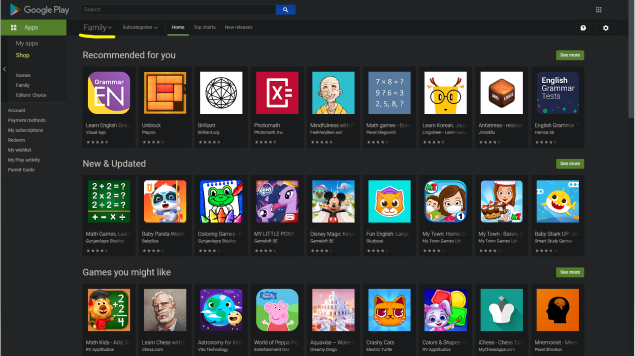
In Apple Store, as a collective genre, Entertainment dominates that platform however, here in Google Play, Lifestyle as a collective genre, are more popular with **Games** appearing in both platforms in the top spot.

Based on the data gathered, I can recommend going for an application that has a genre of **"Games"** in conjuction with **"FAMILY"** genre because we are implementing an application that will be deployed in both platforms and we can clearly see that **"Games"** and **"FAMILY"** has the most occuring genre in the data and Apps in both of these genres are fairly straight forward and doesn't require any background or field of expertise as shown above.
>**BUT** this doesn't mean that genre **Games** are the most profitable path here. The only conclusion that we can get here is that **Games** and **FAMILY** are popular for the devs and later on we will found out why.

In [69]:
print("Android genre column with most number of occurences of genre in descending order");
print("-------------------------------------------")
display_table(final_android, 9); # Google Genre Column

Android genre column with most number of occurences of genre in descending order
-------------------------------------------
Tools : 8.43
Entertainment : 6.07
Education : 5.35
Business : 4.59
Productivity : 3.89
Lifestyle : 3.89
Finance : 3.70
Medical : 3.52
Sports : 3.46
Personalization : 3.32
Communication : 3.24
Action : 3.10
Health & Fitness : 3.08
Photography : 2.95
News & Magazines : 2.80


### Output Explanation
##### Google Play `genre` Column
The most common genre based on the frequency table is **"Tools"** followed by **"Entertainment"**. The top genre for apps consists of utility or tools that have a purpose to help a user achieve a certain goal are in the top spot

**Tools Applications**
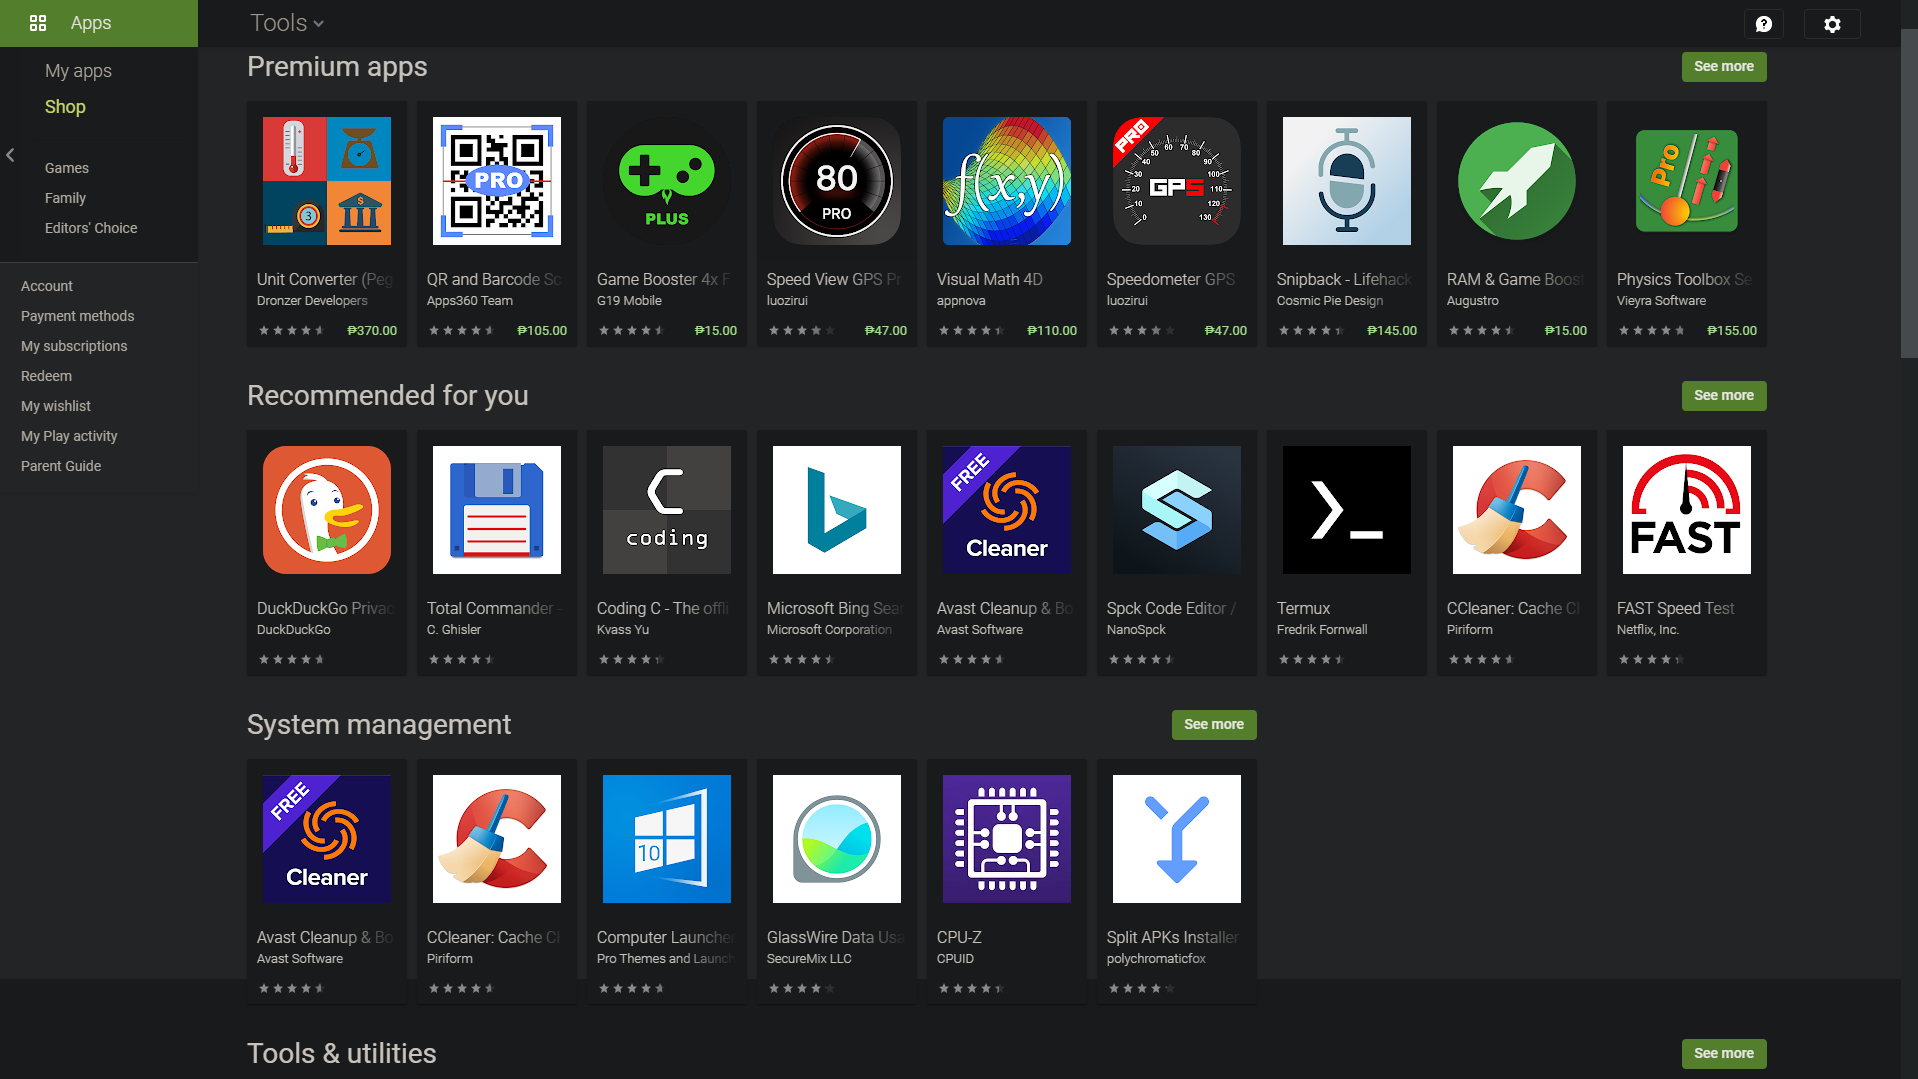
The data gathered are somewhat lacking and doesn't introduce profitable characteristics that we can conclude because these data are the most occuring genres in the google play and doesn't bring the bigger picture about the most attracting application to user which is our goal. However, we can also use this genre later and determine the number of installs and reviews if this genre has the potential to be profitable.

### Walkthrough Explanation ( iOS Ratings Analysis )
With the results above, having games, entertainment and family dominating the most occuring applications in both platform let's see what the ratings in ios.

In [85]:
unique_genre = freq_table(final_ios, 11); # Make frequency table out of prime_genre (Genre of apps)
app_sort = [];

for genre in unique_genre:
    total = 0; # Sum of all ratings
    len_genre = 0; # Count of how many genre
    
    for row in final_ios:
        genre_app = row[11];
        
        # Check if genre_app in `final_ios` is in `unique_genre` to count all unique genres
        if genre_app == genre:
            ratings = float(row[5]);
            total += ratings;
            len_genre += 1;
            
    avg_user_rating = total / len_genre; # Get the average user rating on each genre
    app_sort.append((avg_user_rating, genre)); # Create a list of tuppled apps to sort for later
    
sorted_apps = sorted(app_sort, reverse=True); # Sort apps in descending order

print("Average User Rating sorted in Descending Order");
print("-------------------------------------------------------")
for rating, apps in sorted_apps: # Iterate to the sorted apps
    print("{app_name} : {rating:,.2f}".format(app_name=apps, rating=rating)) # Format output

Average User Rating sorted in Descending Order
-------------------------------------------------------
Navigation : 86,090.33
Reference : 74,942.11
Social Networking : 71,548.35
Music : 57,326.53
Weather : 52,279.89
Book : 39,758.50
Food & Drink : 33,333.92
Finance : 31,467.94
Photo & Video : 28,441.54
Travel : 28,243.80
Shopping : 26,919.69
Health & Fitness : 23,298.02
Sports : 23,008.90
Games : 22,788.67
News : 21,248.02
Productivity : 21,028.41
Utilities : 18,684.46
Lifestyle : 16,485.76
Entertainment : 14,029.83
Business : 7,491.12
Education : 7,003.98
Catalogs : 4,004.00
Medical : 612.00


### Output Explanation
###### Apple Store `avg_user_rating` 
We can clearly see that **Social Networking**, **Reference**, and **Music** skewed the result for this analysis. You may be thinking that this is due to tech giants like Facebook, Google Maps, Spotify etc. that made this result skewed. Let's test our hypothesis.

In [56]:
num_apps = 0; # Variable to limit the displayed result
for app in final_ios:
    if app[11] == "Social Networking" and num_apps < 25:
        print("{app_name} : {num_ratings:,}".format(app_name=app[1], num_ratings=int(app[5]))); # app[1] is App Name and app[5] is number ratings for all versions
        num_apps += 1;

Facebook : 2,974,676
Pinterest : 1,061,624
Skype for iPhone : 373,519
Messenger : 351,466
Tumblr : 334,293
WhatsApp Messenger : 287,589
Kik : 260,965
ooVoo – Free Video Call, Text and Voice : 177,501
TextNow - Unlimited Text + Calls : 164,963
Viber Messenger – Text & Call : 164,249
Followers - Social Analytics For Instagram : 112,778
MeetMe - Chat and Meet New People : 97,072
We Heart It - Fashion, wallpapers, quotes, tattoos : 90,414
InsTrack for Instagram - Analytics Plus More : 85,535
Tango - Free Video Call, Voice and Chat : 75,412
LinkedIn : 71,856
Match™ - #1 Dating App. : 60,659
Skype for iPad : 60,163
POF - Best Dating App for Conversations : 52,642
Timehop : 49,510
Find My Family, Friends & iPhone - Life360 Locator : 43,877
Whisper - Share, Express, Meet : 39,819
Hangouts : 36,404
LINE PLAY - Your Avatar World : 34,677
WeChat : 34,584


In [99]:
num_apps = 0; # Variable to limit the displayed result
for app in final_ios:
    if app[11] == "Music" and num_apps < 25:
        print("{app_name} : {num_ratings:,}".format(app_name=app[1], num_ratings=int(app[5]))); # app[1] is App Name and app[5] is number ratings for all versions
        num_apps += 1;

Pandora - Music & Radio : 1,126,879
Spotify Music : 878,563
Shazam - Discover music, artists, videos & lyrics : 402,925
iHeartRadio – Free Music & Radio Stations : 293,228
SoundCloud - Music & Audio : 135,744
Magic Piano by Smule : 131,695
Smule Sing! : 119,316
TuneIn Radio - MLB NBA Audiobooks Podcasts Music : 110,420
Amazon Music : 106,235
SoundHound Song Search & Music Player : 82,602
Sonos Controller : 48,905
Bandsintown Concerts : 30,845
Karaoke - Sing Karaoke, Unlimited Songs! : 28,606
My Mixtapez Music : 26,286
Sing Karaoke Songs Unlimited with StarMaker : 26,227
Ringtones for iPhone & Ringtone Maker : 25,403
Musi - Unlimited Music For YouTube : 25,193
AutoRap by Smule : 18,202
Spinrilla - Mixtapes For Free : 15,053
Napster - Top Music & Radio : 14,268
edjing Mix:DJ turntable to remix and scratch music : 13,580
Free Music - MP3 Streamer & Playlist Manager Pro : 13,443
Free Piano app by Yokee : 13,016
Google Play Music : 10,118
Certified Mixtapes - Hip Hop Albums & Mixtapes : 9,9

### Output Explanation
##### Apple Store **Social Networking** Genre
Our hypothesis is correct, both genre (**Social Networking**, **Music**) is swarming with large companies and we will be engulf by them if we make an app in those category hence we will avoid those category. This is also true to **Photo & Video** and **Reference** thus we will proceed with **Games**.

In [57]:
'''
Code to output every game and their number of ratings
'''
count = 0
for app in final_ios:
    if app[11] == "Games" and count < 20:
        print("{app_name} : {num_ratings:,}".format(app_name=app[1], num_ratings=int(app[5]))); # app[1] is App Name and app[5] is number ratings for all versions
        count +=1;

Clash of Clans : 2,130,805
Temple Run : 1,724,546
Candy Crush Saga : 961,794
Angry Birds : 824,451
Subway Surfers : 706,110
Solitaire : 679,055
CSR Racing : 677,247
Crossy Road - Endless Arcade Hopper : 669,079
Injustice: Gods Among Us : 612,532
Hay Day : 567,344
PAC-MAN : 508,808
DragonVale : 503,230
Head Soccer : 481,564
Despicable Me: Minion Rush : 464,312
The Sims™ FreePlay : 446,880
Sonic Dash : 418,033
8 Ball Pool™ : 416,736
Tiny Tower - Free City Building : 414,803
Jetpack Joyride : 405,647
Bike Race - Top Motorcycle Racing Games : 405,007


### Output Explanation
##### Apple Store **Games** Genre
At first look we can see that **Games** has a wide variety of gameplay with _different companies_ at the top of our list. We can also see some straight forward games like "Candy Crush Saga", "Angry Birds", and "PAC-MAN" being in the top spot. This is a good indication of developing an app because we can thrive in this genre with a fairly simple app that is unique without having a background or expertise in other fields.
> We can remove outliers that have 2M+ reviews to use this analysis in developing our application

### Walkthrough Explanation ( Android Category Analysis )
With both **Family** category and **Tools** genre being popular in Google Play market, let's see the numbers for the average install for `category` column

In [100]:
unique_genres = freq_table(final_android, 1); # Make frequency table out of Category Column 
sort_apps = []; # Sorted apps based on avg_installs
num_apps = 0; # Variable to limit the displayed apps

for category in unique_genres:
    total = 0; # Sum of the total installs 
    len_category = 0; # Total number of each categories in the data set
    
    for app in final_android:
        category_app = app[1]; # category column
        
        # If the final_android genre (category_app) is a unique genre (category)
        if category_app == category:
            n_install = app[5]; # installs column
            
            # Remove unnecessary symbols to convert to float
            n_install = n_install.replace("+", "");
            n_install = n_install.replace(",","");
            
            total += float(n_install);
            len_category += 1;
        
    avg_install = total / len_category # Compute for the average install in each category
    sort_apps.append((avg_install, category)); # A list of tuples to sort
    
sorted_apps = sorted(sort_apps, reverse=True); # A list of tuple sorted in descending order

print("Average Number of Install per Category sorted in Descending Order");
print("-------------------------------------------------------")
# Output every tuple in the lists in a clean format
for apps in sorted_apps: # Iterate through the sorted apps
    if num_apps < 25: # limit he displayed apps to 25
        print("{category_name} : {avg_install:,.2f}".format(category_name=apps[1], avg_install=apps[0])); # Format output
        num_apps += 1; # Count how many apps have been displayed

Average Number of Install per Category sorted in Descending Order
-------------------------------------------------------
COMMUNICATION : 38,456,119.17
VIDEO_PLAYERS : 24,852,732.41
SOCIAL : 23,253,652.13
ENTERTAINMENT : 21,134,600.00
PHOTOGRAPHY : 17,805,627.64
PRODUCTIVITY : 16,787,331.34
GAME : 15,837,565.09
TRAVEL_AND_LOCAL : 13,984,077.71
TOOLS : 10,695,245.29
NEWS_AND_MAGAZINES : 9,549,178.47
BOOKS_AND_REFERENCE : 8,767,811.89
SHOPPING : 7,036,877.31
PERSONALIZATION : 5,201,482.61
WEATHER : 5,074,486.20
HEALTH_AND_FITNESS : 4,188,821.99
MAPS_AND_NAVIGATION : 4,056,941.77
SPORTS : 3,638,640.14
EDUCATION : 3,082,017.54
FAMILY : 2,691,618.16
FOOD_AND_DRINK : 1,924,897.74
ART_AND_DESIGN : 1,905,351.67
BUSINESS : 1,712,290.15
LIFESTYLE : 1,437,816.27
FINANCE : 1,387,692.48
HOUSE_AND_HOME : 1,313,681.91


### Output Explanation
##### Google Play `avg_install`
We are going way past **Communication**, **VIDEO_PLAYERS**, **SOCIAL** and lots of others and were focusing in **GAME** category as we are much more knowledgeable in the the previous cells that this categories tend to have tech giants in it and we will be engulf if we push through in this categories. But for assurance we will still look into it.

In [94]:
'''
Code to output every COMMUNICATION app and their number of reviews
'''
num_apps = 0; # variable to limit the result
app_installs = [];

for app in final_android:
    if app[1] == "COMMUNICATION":
        app_installs.append((int(app[3]), app[0]))
        
sorted_apps = sorted(app_installs, reverse=True)
for apps in sorted_apps:
    if num_apps < 25: # truncate the result to only 25 apps
        print("{app_name} : {num_reviews:,}".format(app_name=apps[1], num_reviews=apps[0]));
        num_apps += 1;

WhatsApp Messenger : 69,119,316
Messenger – Text and Video Chat for Free : 56,642,847
UC Browser - Fast Download Private & Secure : 17,712,922
BBM - Free Calls & Messages : 12,842,860
Viber Messenger : 11,334,799
LINE: Free Calls & Messages : 10,790,289
Skype - free IM & video calls : 10,484,169
Google Chrome: Fast & Secure : 9,642,995
Truecaller: Caller ID, SMS spam blocking & Dialer : 7,820,209
WeChat : 5,387,333
Opera Mini - fast web browser : 5,149,854
imo free video calls and chat : 4,785,892
Gmail : 4,604,324
Yahoo Mail – Stay Organized : 4,187,998
UC Browser Mini -Tiny Fast Private & Secure : 3,648,120
Hangouts : 3,419,249
Telegram : 3,128,250
Firefox Browser fast & private : 3,075,028
GO SMS Pro - Messenger, Free Themes, Emoji : 2,876,500
KakaoTalk: Free Calls & Text : 2,546,527
Dolphin Browser - Fast, Private & Adblock🐬 : 2,511,130
Opera Browser: Fast and Secure : 2,473,509
Kik : 2,451,136
Who : 2,451,083
CM Browser - Ad Blocker , Fast Download , Privacy : 2,264,916


In [95]:
'''
Code to output every PRODUCTIVITY app and their number of reviews
'''
num_apps = 0; # variable to limit the result
app_installs = [];

for app in final_android:
    if app[1] == "PRODUCTIVITY":
        app_installs.append((int(app[3]), app[0]))
        
sorted_apps = sorted(app_installs, reverse=True)
for apps in sorted_apps:
    if num_apps < 25: # truncate the result to only 25 apps
        print("{app_name} : {num_reviews:,}".format(app_name=apps[1], num_reviews=apps[0]));
        num_apps += 1;

ES File Explorer File Manager : 5,383,985
Microsoft Outlook : 3,252,896
Adobe Acrobat Reader : 3,016,297
SwiftKey Keyboard : 2,764,964
Google Drive : 2,731,171
ColorNote Notepad Notes : 2,401,017
Microsoft Word : 2,084,126
Dropbox : 1,861,310
Mobizen Screen Recorder - Record, Capture, Edit : 1,827,212
WPS Office - Word, Docs, PDF, Note, Slide & Sheet : 1,508,137
CamScanner - Phone PDF Creator : 1,502,622
My Airtel-Online Recharge, Pay Bill, Wallet, UPI : 1,498,393
Evernote – Organizer, Planner for Notes & Memos : 1,488,396
AVG Cleaner – Speed, Battery & Memory Booster : 1,188,154
MyVodafone (India) - Online Recharge & Pay Bills : 1,092,367
Microsoft Excel : 1,079,491
APUS Booster - Space Cleaner & Booster : 1,048,766
Microsoft OneDrive : 1,038,306
Alarm Clock: Stopwatch & Timer : 870,928
Google Calendar : 858,208
Google Docs : 815,981
Google Keep : 691,474
Microsoft PowerPoint : 618,798
File Browser by Astro (File Manager) : 609,182
Advanced Task Killer : 577,059


### Output Explanation
##### Google Play **Communication** and **Productivity** categories
At first look in the previous two cells we can see for our selfs that tech giants are reigning here so we will drop this argument with coolness and respect. We will proceed in looking in much deeper in **Games**

In [92]:
'''
Code to output every game and their number of reviews
'''
num_apps = 0; # variable to limit the result
app_installs = [];

for app in final_android:
    if app[1] == "GAME":
        app_installs.append((int(app[3]), app[0]))
        
sorted_apps = sorted(app_installs, reverse=True)
for apps in sorted_apps:
    if num_apps < 25: # truncate the result to only 25 apps
        print("{app_name} : {num_reviews:,}".format(app_name=apps[1], num_reviews=apps[0]));
        num_apps += 1;

Clash of Clans : 44,891,723
Subway Surfers : 27,722,264
Clash Royale : 23,133,508
Candy Crush Saga : 22,426,677
My Talking Tom : 14,891,223
8 Ball Pool : 14,198,297
Shadow Fight 2 : 10,979,062
Pou : 10,485,308
Pokémon GO : 10,424,925
Minion Rush: Despicable Me Official Game : 10,216,538
Yes day : 10,055,521
Dream League Soccer 2018 : 9,882,639
My Talking Angela : 9,881,829
Hill Climb Racing : 8,923,587
Asphalt 8: Airborne : 8,389,714
Mobile Legends: Bang Bang : 8,219,586
Piano Tiles 2™ : 8,118,880
Temple Run 2 : 8,118,609
Sniper 3D Gun Shooter: Free Shooting Games - FPS : 7,671,249
Farm Heroes Saga : 7,614,130
Trivia Crack : 6,427,773
Candy Crush Soda Saga : 6,198,563
Geometry Dash Lite : 6,181,640
Hungry Shark Evolution : 6,074,334
Angry Birds Classic : 5,566,669


### Output Explanation
##### Google Play **Games** category
Since the category **"GAMES"** appeared in our one of the most installs and reviews in iOS and Android and one of the least outliers influenced by tech giants like **"Entertainment"**, **"Weather"**, and **"Communications"** in Google Play Store and Apple Store, we can use this data as our genre in creating an application since we can clearly see that games has a wide variety simple gameplay and doesn't require expertise in different fields as we are seeing with **Candy Crush Saga**, **Temple Run** and **Piano Tiles** having huge reviews even though we didn't count users that doesn't gave a review.

We can invent a **Game** on our own with the category of **FAMILY** and integrate our ads since our target audience is kids so ads uncapable of disturbance is ideal and it works for our target audience. We can create a baking app with the functionality of multiplayer for parents and their kids or a gardening game, the possibilities are endless in this genre. 

*The devs now can use the data generated here to form their **Game** based on the high ranking of reviews and installs in this analysis, hence we will let them decide on which game they will make.*
> We can remove few apps that have more than 6M+ reviews to remove outliers

## Conclusion
Our goal here is to provide enough data in the question: _"Among the genres in both Apple and Google Play Store, what are the genres that are **Free**, and **English** that are more likely to attract users"_. We achieved this by dividing our work in to two categories: Cleaning and Analyzing in the most ordered way we can possibly think. 

**Cleaning**

The steps that we take in cleaning the data set are:
1. Remove Rows that have Missing Values
2. Remove Duplicate App Entries
3. Remove Non-English Apps in the Dataset
4. Remove Non-Free Apps in the Dataset

**Analyzing**

We then analyzed genres in each platform in the following steps:
1. Ranked prime_genre, category and genre columns that have Most Number of Occurences
2. Ranked num_installs and user_rating 
3. Picked Two App Profiles to Analyze in each platform and genre

---
We concluded that the category **Games** has the most number of reviews and installs in both platforms that has the least outliers and has the most occurences of genre out of all the genres that toped the rank.